In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
from keras.preprocessing import image
from keras.models import Model

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
import cv2
import os

from UNet_model import build_unet


Linux


sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper


(480, 640, 3)
2.0
[0. 1. 2.]


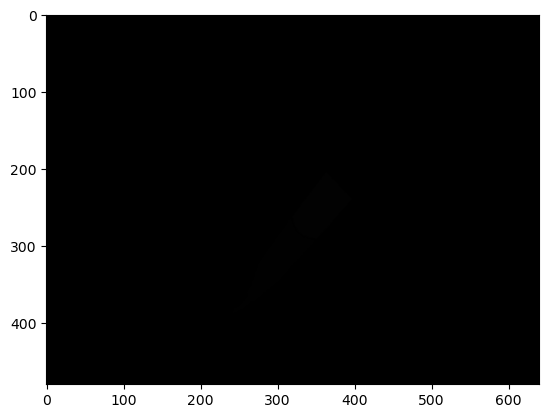

In [3]:
# pic = load_img('./dataset/train/graymasks_augmented/aug__0_1011.png')
pic = load_img('./dataset/train/graymasks_normalized_augmented/aug__0_1011.png', cv2.IMREAD_COLOR)
# pic.getpixel
pic_array = img_to_array(pic)
# pic_array = pic_array
print(pic_array.shape)
print(np.max(pic_array))
print(np.unique(pic_array))
plt.imshow(pic)
# plt.imshow(pic_array)
plt.show()

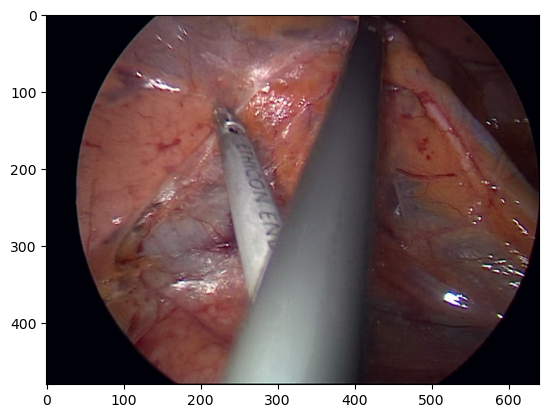

In [19]:
import cv2
import numpy as np
import random

def random_brightness(image, max_delta=10):
    # 이미지의 밝기를 랜덤하게 변경
    # delta = random.randint(-max_delta, max_delta)
    # return cv2.convertScaleAbs(image, alpha=1.0, beta=delta)
    # 이미지의 밝기를 랜덤하게 변경
    delta = random.randint(-max_delta, max_delta)
    return np.clip(image + delta, 0, 255)

delta = 50
# 이미지 파일 읽기
image_path = './dataset/test/raw/img_op4_0004.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

rand = random.randint(-delta, delta)

img1 = image
img2 = cv2.add(image, rand)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# plt.imshow(img1)
# plt.imshow(img2)






In [1]:
import platform
import os
if 'Linux' in platform.system():
    print(platform.system())
    os.system("echo 0 | sudo tee -a /sys/bus/pci/devices/0000\:01\:00.0/numa_node")

from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from keras.layers import Dropout
from keras.models import Model

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, activation='relu', padding="same")(input)
    x = BatchNormalization()(x) # train 속도를 올려줄거라고 생각함..
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)    # e.g. 128x128 -> 64x64
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape, num_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    p4 = Dropout(0.4)(p4)
    b1 = conv_block(p4, 1024)
    b1 = Dropout(0.4)(b1)
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(num_classes, 1, padding="same", activation="softmax")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

if __name__ == "__main__":
    input_shape = (256, 256, 3)
    model = build_unet(input_shape, 11)
    model.summary()

Linux


sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper


: 

: 